* Datafield	설명
* DBNOs(Down But Not Out)	적을 기절시켰으나, 적 팀원에 의해 부활되어 실제로는 킬로 처리되지 않은 횟수
* assists	아군이 킬했을 때 같이 데미지를 넣은 수 (말 그대로 어시스트)
* boosts	부스트 아이템 사용 횟수
* damageDealt	총 넣은 데미지 (단, 팀에 준 피해나 자해는 포함되지 않음)
* headshotKills	헤드샷 킬 수
* heals	힐링 아이템 사용 횟수
* Id	플레이어 ID
* killPlace	매치에서의 킬 횟수 순위
* killPoints	킬 수로 산정한 ELO의 개념. 만약 rankPoints에 -1 이외의 값이 있다면, killPoints의 0값은 값이 없는 것으로 처리됨.
* killStreaks	짧은 시간동안 최대한 많이 킬했을 때의 킬 수
* kills	총 킬 수
* longestKill	킬과 킬 사이의 이동한 가장 긴 거리
* matchDuration	매치의 시간 (초 단위)
* matchId	매치 ID (트레이닝 데이터와 테스트 데이터에 동일한 매치 ID는 없음)
* matchType	매치 타입 “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; 나머지는 이벤트 또는 커스텀 매치
* rankPoints	랭킹 ELO의 개념
* revives	아군 부활 횟수
* rideDistance	탈것으로 이동한 총 거리
* roadKills	탈것으로 킬한 횟수
* swimDistance	수영한 총 거리
* teamKills	팀킬 횟수
* vehicleDestroys	차량 폭파 횟수
* walkDistance	걸어간 총 거리
* weaponsAcquired	얻은 무기의 수
* winPoints	승리 횟수로 판단한 ELO의 개념
* groupId	매치 내 그룹 아이디, 동일 그룹 구성원들이 다른 게임을 할 때마다 새로운 그룹 아이디가 부여됨
* numGroups	게임 내 총 그룹 수 (솔로 -> 듀오 -> 스쿼드로 갈 수록 줄어듦)
* maxPlace	매치 내에서 최악의 등수
* winPlacePerc	예측 목표, 1에 가까워질 수록 순위가 높아진다. (0부터 1까지의 값으로 나타냄. 1은 1등을, 0은 꼴등을 의미한다.)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-finish-placement-prediction/train_V2.csv
/kaggle/input/pubg-finish-placement-prediction/test_V2.csv
/kaggle/input/pubg-finish-placement-prediction/sample_submission_V2.csv


In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 400)
pd.options.display.float_format='{:.2f}'.format

In [3]:
train= pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/train_V2.csv')
test= pd.read_csv('/kaggle/input/pubg-finish-placement-prediction/test_V2.csv')

In [4]:
train.head()


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.00,0,0.00,0,0,244.80,1,1466,0.44
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.00,0,11.04,0,0,1434.00,5,0,0.64
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.00,0,0.00,0,0,161.80,2,0,0.78
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.00,0,0.00,0,0,202.70,3,0,0.17
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.00,0,0.00,0,0,49.75,2,0,0.19


In [5]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [6]:
print(train.shape)
print(test.shape)

(4446966, 29)
(1934174, 28)


In [7]:
train[train['winPlacePerc'].isnull()]
train.dropna(inplace=True)

In [8]:
train.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00,4446965.00
mean,0.23,1.11,130.72,0.66,0.23,1.37,47.60,505.01,0.92,0.54,23.00,1579.51,44.50,43.01,892.01,0.16,606.12,0.00,4.51,0.02,0.01,1154.22,3.66,606.46,0.47
std,0.59,1.72,170.78,1.15,0.60,2.68,27.46,627.50,1.56,0.71,50.97,258.74,23.83,23.29,736.65,0.47,1498.34,0.07,30.50,0.17,0.09,1183.50,2.46,739.70,0.31
min,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,133.00,2.00,1.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00,0.00,24.00,0.00,0.00,0.00,0.00,1367.00,28.00,27.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,155.10,2.00,0.00,0.20
50%,0.00,0.00,84.24,0.00,0.00,0.00,47.00,0.00,0.00,0.00,0.00,1438.00,30.00,30.00,1443.00,0.00,0.00,0.00,0.00,0.00,0.00,685.60,3.00,0.00,0.46
75%,0.00,2.00,186.00,1.00,0.00,2.00,71.00,1172.00,1.00,1.00,21.32,1851.00,49.00,47.00,1500.00,0.00,0.19,0.00,0.00,0.00,0.00,1976.00,5.00,1495.00,0.74
max,22.00,33.00,6616.00,53.00,64.00,80.00,101.00,2170.00,72.00,20.00,1094.00,2237.00,100.00,100.00,5910.00,39.00,40710.00,18.00,3823.00,12.00,5.00,25780.00,236.00,2013.00,1.00


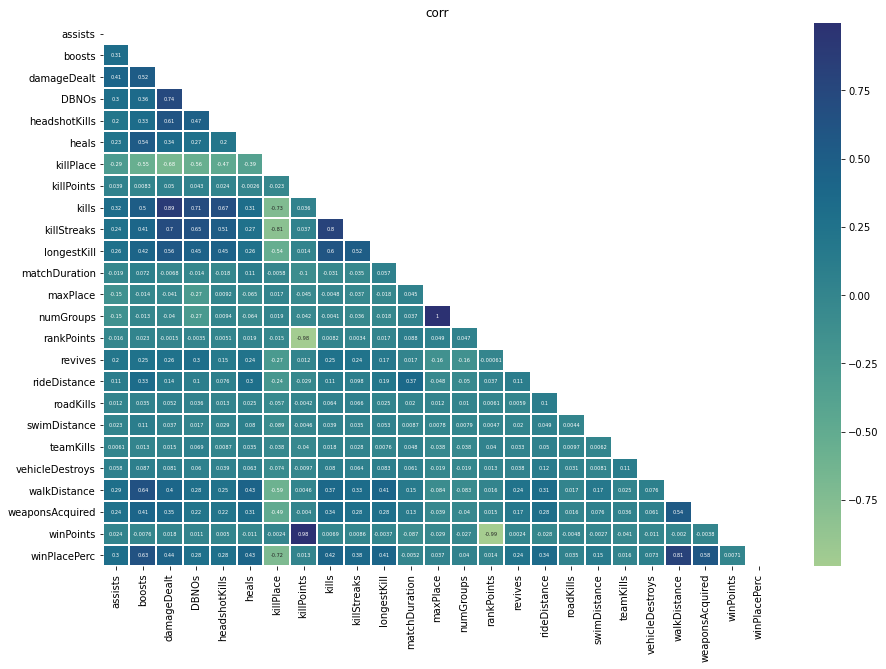

In [9]:
corr= train.corr()
mask= np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(15,10))
plt.title('corr')

sns.heatmap(corr, mask=mask, annot=True, cmap='crest', linewidths=0.2,annot_kws={'size':5})
plt.show()


### corr


In [10]:
corr['winPlacePerc'].sort_values(ascending=False)

winPlacePerc       1.00
walkDistance       0.81
boosts             0.63
weaponsAcquired    0.58
damageDealt        0.44
heals              0.43
kills              0.42
longestKill        0.41
killStreaks        0.38
rideDistance       0.34
assists            0.30
DBNOs              0.28
headshotKills      0.28
revives            0.24
swimDistance       0.15
vehicleDestroys    0.07
numGroups          0.04
maxPlace           0.04
roadKills          0.03
teamKills          0.02
rankPoints         0.01
killPoints         0.01
winPoints          0.01
matchDuration     -0.01
killPlace         -0.72
Name: winPlacePerc, dtype: float64

winplacperc corr 고려 시 feature 를 3가지 카테고리로 분류가능  14개정도만 고려해보자 corr 0.15+
* item : boost /  weaponsAcquired / heals
* distance : walkdistance / ridedistance/ swimdistance
* activity : damagedealt / kills/ longestkill / assist / DBNOS/ revive/ headshotkills /killplace

In [11]:
train['matchType'].value_counts()

squad-fpp           1756186
duo-fpp              996691
squad                626526
solo-fpp             536761
duo                  313591
solo                 181943
normal-squad-fpp      17174
crashfpp               6287
normal-duo-fpp         5489
flaretpp               2505
normal-solo-fpp        1682
flarefpp                718
normal-squad            516
crashtpp                371
normal-solo             326
normal-duo              199
Name: matchType, dtype: int64

fpp/ tpp / matchtype 가 winplacperc 에 미치는 영향 파악필요



In [12]:
train.groupby(['matchType','winPlacePerc'])['winPlacePerc'].count()

matchType  winPlacePerc
crashfpp   0.00              287
           0.02                4
           0.02               21
           0.02               42
           0.02               27
                           ...  
squad-fpp  0.97               71
           0.97               30
           0.97                8
           0.97                4
           1.00            65418
Name: winPlacePerc, Length: 9891, dtype: int64

In [13]:
match_crosstab= pd.crosstab(train.winPlacePerc>= 0.7, train.matchType, margins=True).style.background_gradient(cmap='crest')
match_crosstab

matchType,crashfpp,crashtpp,duo,duo-fpp,flarefpp,flaretpp,normal-duo,normal-duo-fpp,normal-solo,normal-solo-fpp,normal-squad,normal-squad-fpp,solo,solo-fpp,squad,squad-fpp,All
winPlacePerc,,,,,,,,,,,,,,,,,
False,4438,263,220549,700789,529,1852,131,3680,186,1027,325,11471,129323,377788,453444,1255073,3160868
True,1849,108,93042,295902,189,653,68,1809,140,655,191,5703,52620,158973,173082,501113,1286097
All,6287,371,313591,996691,718,2505,199,5489,326,1682,516,17174,181943,536761,626526,1756186,4446965


winplaaceperc 상위 30% 의 matchtype, fpp/tpp 사용경향
* squad-fpp 501113
* duo-fpp 295902
* squad 173082
* solo-fpp 158973
* duo- 93042
* solo 52620

순으로 높다 solo보다는 squad >  duo 순으로 높다
squad, duo 사용 집단, fpp 집단을 feature 에 사용할 필요가 있음


In [14]:
train['teamplay']=train['matchType'].str.contains('squad|duo').astype(int)

train['fpp']= train['matchType'].str.contains('-fpp').astype(int)

In [15]:
train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,teamplay,fpp
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.00,0,0.00,0,0,244.80,1,1466,0.44,1,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.00,0,11.04,0,0,1434.00,5,0,0.64,1,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.00,0,0.00,0,0,161.80,2,0,0.78,1,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.00,0,0.00,0,0,202.70,3,0,0.17,1,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.00,0,0.00,0,0,49.75,2,0,0.19,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.00,0,0.00,0,0,1019.00,3,1507,0.18,1,1
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.00,0,0.00,0,0,81.70,6,0,0.29,0,0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.00,0,2.18,0,0,788.70,4,0,0.48,1,1
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.00,0,0.00,0,0,2748.00,8,0,0.80,1,1


In [16]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor as xgb
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor


1. walkDistance       0.81
1. boosts             0.63
1. weaponsAcquired    0.58
1. damageDealt        0.44
1. heals              0.43
1. kills              0.42
1. longestKill        0.41
1. killStreaks        0.38
1. rideDistance       0.34
1. assists            0.30

In [17]:
X = train[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints']]
X['walkDistance_to_mean'] = X['walkDistance'] / X['walkDistance'].mean()
X['walkDistance_to_kill'] = X['walkDistance'] / X['kills']
y = train['winPlacePerc']
X_test = test[['assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'maxPlace', 'numGroups', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints']]
X_test['walkDistance_to_mean'] = X_test['walkDistance'] / X_test['walkDistance'].mean()
X_test['walkDistance_to_kill'] = X_test['walkDistance'] / X_test['kills']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [18]:
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

In [19]:
params = {"objective" : "regression", "metric" : "mae", "max_depth": 5, "min_child_samples": 20, "reg_alpha": 0.2, "reg_lambda": 0.2,
        "num_leaves" : 33, "learning_rate" : 0.2, "subsample" : 0.9, "colsample_bytree" : 0.9, "subsample_freq ": 6}
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
# Cleaning and defining parameters for LGBM
model = lgb.LGBMRegressor(**params, n_estimators = 5000, nthread = 4, n_jobs = -1)

In [20]:
prediction = np.zeros(test.shape[0])
scores = []
for fold_n, (train_index, test_index) in enumerate(folds.split(X)):
    print('Fold:', fold_n)
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model.fit(X_train, y_train, 
            eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='mae',
            verbose=500, early_stopping_rounds=100)
    
    y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
    prediction += y_pred
    
    scores.append(mean_absolute_error(y_valid, model.predict(X_valid)))
prediction /= n_fold

Fold: 0
[LightGBM] [Warning] subsample_freq is set=0, subsample_freq= will be ignored. Current value: subsample_freq=0
[LightGBM] [Warning] Unknown parameter: 6
[LightGBM] [Warning] num_threads is set with nthread=4, will be overridden by n_jobs=-1. Current value: num_threads=-1
Training until validation scores don't improve for 100 rounds
[500]	training's l1: 0.0613705	valid_1's l1: 0.0615151
[1000]	training's l1: 0.0607336	valid_1's l1: 0.0611109
[1500]	training's l1: 0.0603685	valid_1's l1: 0.0609511
[2000]	training's l1: 0.0600945	valid_1's l1: 0.0608871
[2500]	training's l1: 0.0598574	valid_1's l1: 0.0608357
[3000]	training's l1: 0.0596315	valid_1's l1: 0.0607897
Early stopping, best iteration is:
[3372]	training's l1: 0.0594826	valid_1's l1: 0.0607685
Fold: 1
[LightGBM] [Warning] subsample_freq is set=0, subsample_freq= will be ignored. Current value: subsample_freq=0
[LightGBM] [Warning] Unknown parameter: 6
[LightGBM] [Warning] num_threads is set with nthread=4, will be overrid

In [21]:
print(f'Mean CV: {np.mean(scores):.4f}. Std: {np.std(scores):.4f}')


Mean CV: 0.0609. Std: 0.0001


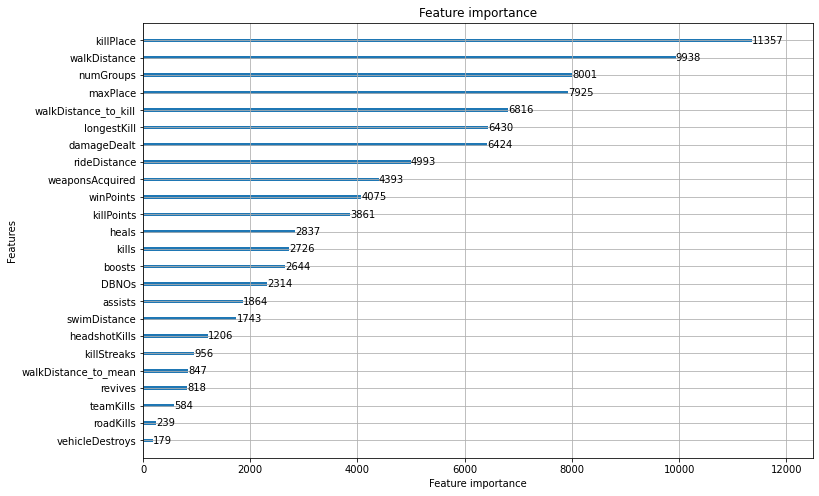

In [22]:
lgb.plot_importance(model, max_num_features=30, figsize=(12, 8));
plt.title('Feature importance');

In [23]:
submission = pd.read_csv('../input/pubg-finish-placement-prediction/sample_submission_V2.csv')
submission['winPlacePerc'] = np.clip(prediction, 0, 1)


In [24]:
submission.to_csv('submission.csv', index=False)